# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TODO: Insert your surname, name and ID number

Student surname: Conforto

Student name: Filippo
    
ID: 2021856

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm
from IPython.core.display import display, HTML

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2021856# place a random seed
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

while(np.any(np.unique(y, return_counts=True)[1]<10)):
    permutation = np.random.permutation(X.shape[0])
    
    X = X[permutation]
    y = y[permutation]
    
m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]



labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [63 67 54 50 57 54 67 61 72 55]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

In [7]:
print(X_train.shape)

(600, 784)


INPUT:


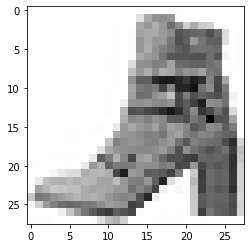

LABEL: 9
INPUT:


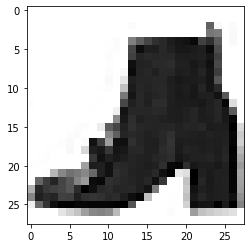

LABEL: 9
INPUT:


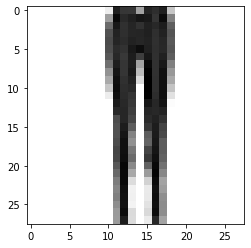

LABEL: 1
INPUT:


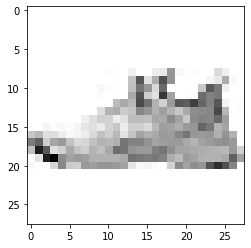

LABEL: 7


In [8]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [9]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#train linear SVM
svc=SVC(kernel='linear')
gd=GridSearchCV(svc, parameters, cv=4).fit(X_train,y_train)
res=pd.DataFrame(gd.cv_results_)
print ('RESULTS FOR LINEAR KERNEL')
display(HTML(res.to_html()))
print("Best parameters set found:")
print(gd.best_estimator_)
print("Score with best parameters:")
print(gd.best_score_)
print("All scores on the grid:")
print(res[["param_C","mean_test_score"]])

best=gd.best_estimator_

RESULTS FOR LINEAR KERNEL


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.375786,0.016635,0.087012,0.005756,0.001,{'C': 0.001},0.526667,0.513333,0.54,0.500000,0.520000,0.014907,6
1,0.166382,0.007471,0.059054,0.003708,0.01,{'C': 0.01},0.773333,0.760000,0.78,0.766667,0.770000,0.007454,5
2,0.135328,0.002854,0.052417,0.002172,0.1,{'C': 0.1},0.826667,0.780000,0.82,0.766667,0.798333,0.025550,1
3,0.136986,0.003889,0.053165,0.003005,1,{'C': 1},0.826667,0.760000,0.80,0.780000,0.791667,0.024664,2
4,0.142071,0.005140,0.050862,0.001528,10,{'C': 10},0.826667,0.760000,0.80,0.780000,0.791667,0.024664,2
5,0.140437,0.009113,0.054158,0.004616,100,{'C': 100},0.826667,0.760000,0.80,0.780000,0.791667,0.024664,2


Best parameters set found:
SVC(C=0.1, kernel='linear')
Score with best parameters:
0.7983333333333333
All scores on the grid:
  param_C  mean_test_score
0   0.001         0.520000
1    0.01         0.770000
2     0.1         0.798333
3       1         0.791667
4      10         0.791667
5     100         0.791667


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [10]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of degree 2 kernel
svc=SVC(kernel='poly', degree=2)
gd=GridSearchCV(svc, parameters).fit(X_train,y_train)
res=pd.DataFrame(gd.cv_results_)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')
display(HTML(res.to_html()))
print("Best parameters set found:")
print(gd.best_estimator_)
print("Score with best parameters:")
print(gd.best_score_)

print("\nAll scores on the grid:")
print(res[["param_C","param_gamma","mean_test_score"]])

RESULTS FOR POLY DEGREE=2 KERNEL


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.177237,0.008922,0.045697,0.001427,0.05,0.05,"{'C': 0.05, 'gamma': 0.05}",0.791667,0.733333,0.766667,0.741667,0.700000,0.746667,0.031002,4
1,0.141046,0.008227,0.040756,0.000963,0.05,0.5,"{'C': 0.05, 'gamma': 0.5}",0.775000,0.750000,0.783333,0.750000,0.691667,0.750000,0.032059,2
2,0.141620,0.005228,0.041911,0.003334,0.05,5,"{'C': 0.05, 'gamma': 5.0}",0.775000,0.758333,0.783333,0.733333,0.683333,0.746667,0.035978,4
3,0.149441,0.008121,0.043491,0.004540,0.5,0.05,"{'C': 0.5, 'gamma': 0.05}",0.800000,0.766667,0.808333,0.750000,0.750000,0.775000,0.024721,1
4,0.142703,0.006413,0.038551,0.001042,0.5,0.5,"{'C': 0.5, 'gamma': 0.5}",0.775000,0.758333,0.783333,0.733333,0.683333,0.746667,0.035978,4
5,0.143198,0.005655,0.040681,0.002296,0.5,5,"{'C': 0.5, 'gamma': 5.0}",0.775000,0.758333,0.783333,0.733333,0.683333,0.746667,0.035978,4
6,0.138572,0.005445,0.041934,0.003406,5,0.05,"{'C': 5, 'gamma': 0.05}",0.775000,0.750000,0.783333,0.750000,0.691667,0.750000,0.032059,2
7,0.139402,0.002525,0.040778,0.003001,5,0.5,"{'C': 5, 'gamma': 0.5}",0.775000,0.758333,0.783333,0.733333,0.683333,0.746667,0.035978,4
8,0.143284,0.010091,0.039656,0.002022,5,5,"{'C': 5, 'gamma': 5.0}",0.775000,0.758333,0.783333,0.733333,0.683333,0.746667,0.035978,4


Best parameters set found:
SVC(C=0.5, degree=2, gamma=0.05, kernel='poly')
Score with best parameters:
0.775

All scores on the grid:
  param_C param_gamma  mean_test_score
0    0.05        0.05         0.746667
1    0.05         0.5         0.750000
2    0.05           5         0.746667
3     0.5        0.05         0.775000
4     0.5         0.5         0.746667
5     0.5           5         0.746667
6       5        0.05         0.750000
7       5         0.5         0.746667
8       5           5         0.746667


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 4th degree).

In [11]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of higher degree kernel
degree = 4
svc=SVC(kernel='poly', degree=degree)
gd=GridSearchCV(svc, parameters).fit(X_train,y_train)
res=pd.DataFrame(gd.cv_results_)
print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')
display(HTML(res.to_html()))
print("Best parameters set found:")
print(gd.best_estimator_)

print("Score with best parameters:")
print(gd.best_score_)

print("\nAll scores on the grid:")
print(res[["param_C","param_gamma","mean_test_score"]])

RESULTS FOR POLY DEGREE= 4  KERNEL


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.153725,0.010553,0.038956,0.002548,0.05,0.05,"{'C': 0.05, 'gamma': 0.05}",0.758333,0.683333,0.741667,0.700000,0.666667,0.710000,0.034721,1
1,0.130060,0.010371,0.041096,0.004133,0.05,0.5,"{'C': 0.05, 'gamma': 0.5}",0.741667,0.641667,0.725000,0.708333,0.591667,0.681667,0.056372,3
2,0.129422,0.004869,0.037578,0.002692,0.05,5,"{'C': 0.05, 'gamma': 5.0}",0.741667,0.641667,0.725000,0.708333,0.591667,0.681667,0.056372,3
3,0.130511,0.005384,0.035825,0.001263,0.5,0.05,"{'C': 0.5, 'gamma': 0.05}",0.725000,0.708333,0.708333,0.725000,0.650000,0.703333,0.027689,2
4,0.131052,0.005234,0.037905,0.003285,0.5,0.5,"{'C': 0.5, 'gamma': 0.5}",0.741667,0.641667,0.725000,0.708333,0.591667,0.681667,0.056372,3
5,0.127651,0.004963,0.038714,0.003641,0.5,5,"{'C': 0.5, 'gamma': 5.0}",0.741667,0.641667,0.725000,0.708333,0.591667,0.681667,0.056372,3
6,0.127853,0.007491,0.038823,0.003300,5,0.05,"{'C': 5, 'gamma': 0.05}",0.733333,0.633333,0.725000,0.700000,0.600000,0.678333,0.052599,9
7,0.132279,0.005748,0.037389,0.001218,5,0.5,"{'C': 5, 'gamma': 0.5}",0.741667,0.641667,0.725000,0.708333,0.591667,0.681667,0.056372,3
8,0.127981,0.008036,0.037569,0.002171,5,5,"{'C': 5, 'gamma': 5.0}",0.741667,0.641667,0.725000,0.708333,0.591667,0.681667,0.056372,3


Best parameters set found:
SVC(C=0.05, degree=4, gamma=0.05, kernel='poly')
Score with best parameters:
0.7100000000000001

All scores on the grid:
  param_C param_gamma  mean_test_score
0    0.05        0.05         0.710000
1    0.05         0.5         0.681667
2    0.05           5         0.681667
3     0.5        0.05         0.703333
4     0.5         0.5         0.681667
5     0.5           5         0.681667
6       5        0.05         0.678333
7       5         0.5         0.681667
8       5           5         0.681667


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [12]:
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

#run SVM with rbf kernel

svc=SVC(kernel='rbf')
gd=GridSearchCV(svc, parameters).fit(X_train,y_train)
res=pd.DataFrame(gd.cv_results_)

print ('RESULTS FOR rbf KERNEL')
display(HTML(res.to_html()))
print("Best parameters set found:")
print(gd.best_estimator_)

print("Score with best parameters:")
print(gd.best_score_)

print("\nAll scores on the grid:")
print(res[["param_C","param_gamma","mean_test_score"]])



RESULTS FOR rbf KERNEL


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.262006,0.009981,0.063037,0.006832,0.5,0.005,"{'C': 0.5, 'gamma': 0.005}",0.775000,0.716667,0.741667,0.725000,0.683333,0.728333,0.030092,7
1,0.446661,0.010849,0.061668,0.002646,0.5,0.05,"{'C': 0.5, 'gamma': 0.05}",0.691667,0.608333,0.716667,0.616667,0.708333,0.668333,0.046368,8
2,0.480832,0.006083,0.066552,0.003633,0.5,0.5,"{'C': 0.5, 'gamma': 0.5}",0.116667,0.125000,0.125000,0.116667,0.116667,0.120000,0.004082,12
3,0.487329,0.006820,0.069961,0.004283,0.5,5,"{'C': 0.5, 'gamma': 5}",0.116667,0.125000,0.125000,0.116667,0.116667,0.120000,0.004082,12
4,0.187045,0.008007,0.049248,0.001658,5,0.005,"{'C': 5, 'gamma': 0.005}",0.833333,0.766667,0.825000,0.775000,0.775000,0.795000,0.028186,1
5,0.463537,0.008648,0.061403,0.003737,5,0.05,"{'C': 5, 'gamma': 0.05}",0.791667,0.758333,0.841667,0.716667,0.775000,0.776667,0.040961,4
6,0.487242,0.004458,0.067800,0.004984,5,0.5,"{'C': 5, 'gamma': 0.5}",0.116667,0.158333,0.133333,0.125000,0.125000,0.131667,0.014337,9
7,0.498244,0.011900,0.070003,0.007179,5,5,"{'C': 5, 'gamma': 5}",0.116667,0.125000,0.125000,0.116667,0.116667,0.120000,0.004082,12
8,0.191990,0.010466,0.050071,0.002008,50,0.005,"{'C': 50, 'gamma': 0.005}",0.816667,0.800000,0.816667,0.758333,0.758333,0.790000,0.026562,2
9,0.504610,0.038094,0.068405,0.007319,50,0.05,"{'C': 50, 'gamma': 0.05}",0.791667,0.758333,0.841667,0.716667,0.775000,0.776667,0.040961,4


Best parameters set found:
SVC(C=5, gamma=0.005)
Score with best parameters:
0.7949999999999999

All scores on the grid:
   param_C param_gamma  mean_test_score
0      0.5       0.005         0.728333
1      0.5        0.05         0.668333
2      0.5         0.5         0.120000
3      0.5           5         0.120000
4        5       0.005         0.795000
5        5        0.05         0.776667
6        5         0.5         0.131667
7        5           5         0.120000
8       50       0.005         0.790000
9       50        0.05         0.776667
10      50         0.5         0.131667
11      50           5         0.120000
12     500       0.005         0.790000
13     500        0.05         0.776667
14     500         0.5         0.131667
15     500           5         0.120000


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?
    
    By changing the kernel and the parameters we obtain different results. We can se that often the best result is obtained with an intermediate value of the parameters. Also changing the kernel type we can see that with polinomial kernel we have worse results, probably due to overfitting, while for the rbf kernel we obtain a slightly worse result than the linear kernel one.

## TO DO 5
Report here the best SVM kernel and parameters

In [13]:
#get training and test error for the best SVM model from CV
print("Linear kernel has the best results")
best_SVM = best

training_error=1-best_SVM.score(X_train,y_train)
test_error=1-best_SVM.score(X_test,y_test)


# (error is 1 - svm.score)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Linear kernel has the best results
Best SVM training error: 0.035000
Best SVM test error: 0.202500


## TO DO 6

Analyze how the classification boundaries depend on the C parameter

In [14]:
# Function to plot the data and classification boundaries. 


def plot_data(model, X_train, y_train, X_test, y_test, train_error, test_error):
    
    def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - abs(0.1*x.min()), x.max() + abs(0.1*x.min())
        y_min, y_max = y.min() - abs(0.1*y.min()), y.max() + abs(0.1*y.min())
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out
    
    
    
    # Plot
    fig, ax = plt.subplots(1,2,figsize=(15,5))

    # Training set
    X0, X1 = X_train_pca[:, 0], X_train_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[0], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[0].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[0].set_xticks(())
    ax[0].set_yticks(())
    ax[0].set_title('Training data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],train_error))
    
    # Test set
    X0, X1 = X_test_pca[:, 0], X_test_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[1], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[1].scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[1].set_xticks(())
    ax[1].set_yticks(())
    ax[1].set_title('Test data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],test_error))
    
    plt.show()

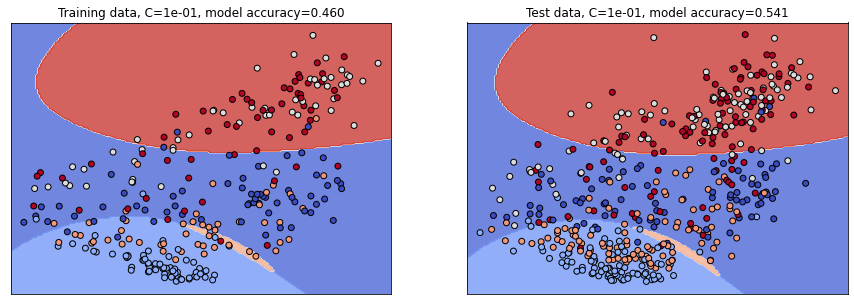

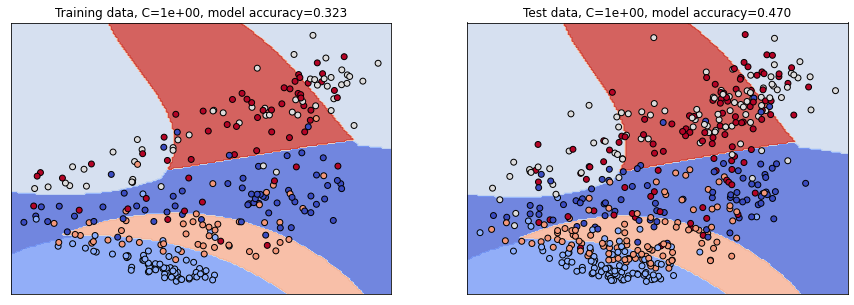

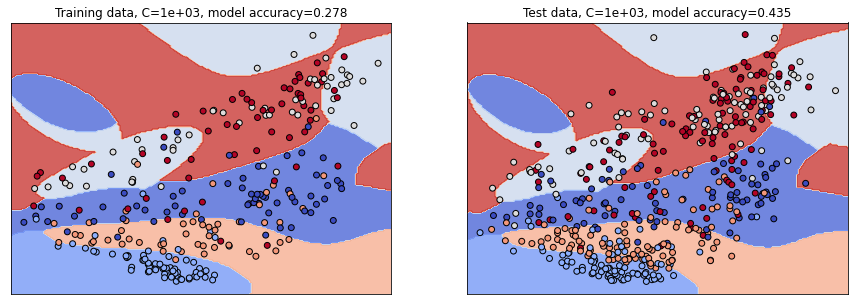

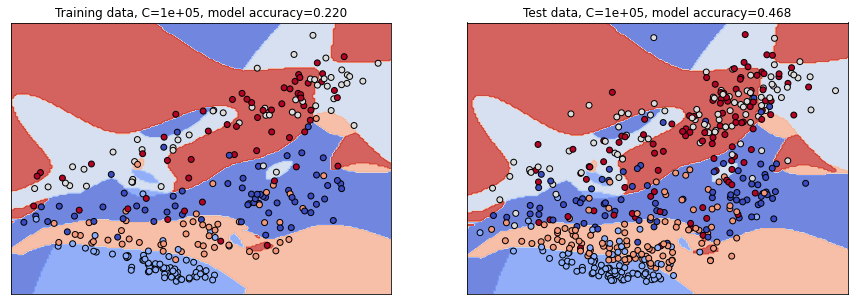

In [15]:
# Too many test samples for visualization, plot only some of them
m_test = 1000
p = np.random.permutation(X_test.shape[0])[:m_test]
X_test_red, y_test_red = X_test[p,:], y_test[p]

# Perform classification only on subset of original classes for better visualization

class_list = [0,1,2,3,4] #YOU CAN TRY TO CHANGE THE CLASSES

train_idxs = [i for i in range(len(y_train)) if y_train[i] in class_list]   
test_idxs = [i for i in range(len(y_test_red)) if y_test_red[i] in class_list] 
X_train_plot = X_train[train_idxs,:]
X_test_plot = X_test_red[test_idxs,:] 
y_train_plot = y_train[train_idxs]
y_test_plot = y_test_red[test_idxs] 


# The dimensionality is reduced to 2 for visualization using PCA
# PCA: Reduce the dimensionality trying to preserve the information content. 
# PCA will be the topic of one of the very last lectures

# Reduce X dimensionality to 2 for visualization
pca = PCA(n_components=2, svd_solver='randomized', whiten=True).fit(X_train)
X_train_pca, X_test_pca = pca.transform(X_train_plot), pca.transform(X_test_plot)


C_list = [1e-1, 1, 1e3, 1e5]
gamma = 0.5

# Fit the prediction model on train_plot data futher reduced with PCA, 
# then classify with different prediction models and plot data
# Use RBF kernel 

for C in C_list:
    my_svm = SVC(kernel='rbf',C=C,gamma=gamma)
    my_svm.fit(X_train_pca,y_train_plot)
    
    train_error, test_error = 1-my_svm.score(X_train_pca,y_train_plot), 1-my_svm.score(X_test_pca,y_test_plot)

    plot_data(my_svm, X_train_pca, y_train_plot, X_test_pca, y_test_plot,train_error,test_error)

## QUESTION 2
How do the shape of the boundaries changes when trying different values of C ?
    
    The shapes changes from a rounded form to a indefinite form that superimposes on the points. This is due to C change, for high C the results have an high dependence on the points, while for low C the SVM is regularized.
    This leads to overfitting in the high C case, as we can see from the areas where one point is associated to one color, or to the opposite behavior with low C.

## TO DO 7

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [16]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)

[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


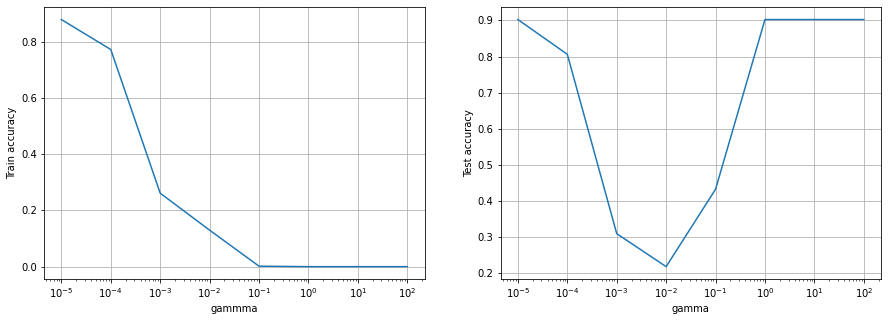

In [17]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

C=1
for gamma in gamma_values:
    my_svm = SVC(kernel='rbf',C=C,gamma=gamma)
    my_svm.fit(X_train,y_train)
    
    train_error, test_error = 1-my_svm.score(X_train,y_train), 1-my_svm.score(X_test,y_test)
    train_acc_list.append(train_error)
    test_acc_list.append(test_error)

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gammma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 3
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

    It can be easily seen that for the training set increasing gamma means better results, while for the test set the best result is obtained for an intermediate value of gamma. This is is probably due that higher values of gamma leads to severe overfitting of the training data and so to worse result in the test set.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [18]:
X = X[permutation]
y = y[permutation]

m_training = 1500 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [143 132 163 145 141 173 158 151 141 153]


## TO DO 8

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  1500$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [19]:
#get training and test error for the best SVM model from CV
best_SVM.fit(X_train, y_train)

training_error=1-best_SVM.score(X_train,y_train)
test_error=1-best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.049333
Best SVM test error: 0.181573


Just for comparison, let's also use logistic regression 

## TO DO 9 Try first without regularization (use a very large large C)¶

In [25]:
from sklearn import linear_model

logreg=linear_model.LogisticRegression(C=1e10, max_iter=1000)

logreg.fit(X_train, y_train)

training_error=1-logreg.score(X_train,y_train)
test_error=1-logreg.score(X_test,y_test)
print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.212188


## TO DO 10 Try  with regularization (use C=1)¶

In [21]:
logreg=linear_model.LogisticRegression(C=1, max_iter=1000)

logreg.fit(X_train, y_train)

training_error=1-logreg.score(X_train,y_train)
test_error=1-logreg.score(X_test,y_test)
print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.010000
Best regularized logistic regression test error: 0.190940


## QUESTION 4
Compare and discuss:
- the results from SVM with m=600 and with m=1500 training data points. If you stopped the SVM, include such aspect in your comparison.

      The error are very similar to the previous case, with a slightly better test error, probably due to the fact we have fitted the SVM over a larger training set. The training error is a bit worse and this is again a consequence of a larger training set with more distributed points.
    
- the results of SVM and of Logistic Regression

      Logistic regression has a very low training error and an higher test error. These two results are probably due to overfitting of the training data and to the fact the logistic regression is a worse model than SVM. The regularization offers a better result for this particular model, but still worse than SVM.

## TO DO 11
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

INPUT:


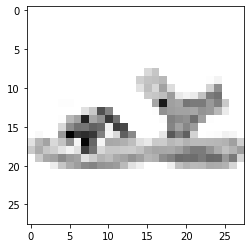

LABEL: 5


In [22]:
LR_prediction = logreg.predict(X_test)
SVM_prediction = best_SVM.predict(X_test)

for i, (lr,sv) in enumerate(zip(LR_prediction,SVM_prediction)):
    if(lr!=y_train[i] and sv==y_train[i]):
        plot_input(X_train,y_train,i)
        break

## TO DO 12
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [23]:
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = confusion_matrix(y_test,SVM_prediction)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR = confusion_matrix(y_test,LR_prediction)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5857 5868 5837 5855 5859 5827 5842 5849 5859 5847]

 Confusion matrix SVM  
 
 [[4662    6  124  391   18    7  584    0   64    1]
 [  34 5552   74  189    3    1   14    0    1    0]
 [ 106    8 4165   62  683    6  782    0   25    0]
 [ 233   87  110 5072  199    0  129    0   25    0]
 [  24   13  773  256 4004    2  759    0   27    1]
 [   9    3    0    3    1 5272    1  356   23  159]
 [1068   10  832  212  396    3 3248    0   72    1]
 [   0    0    0    0    0  315    0 5337    8  189]
 [  46    5  108   37   13  122  186   27 5307    8]
 [   6    2    4    2    0  164    0  407    3 5259]]

 Confusion matrix SVM (normalized)   
 
 [[0.8  0.   0.02 0.07 0.   0.   0.1  0.   0.01 0.  ]
 [0.01 0.95 0.01 0.03 0.   0.   0.   0.   0.   0.  ]
 [0.02 0.   0.71 0.01 0.12 0.   0.13 0.   0.   0.  ]
 [0.04 0.01 0.02 0.87 0.03 0.   0.02 0.   0.   0.  ]
 [0.   0.   0.13 0.04 0.68 0.   0.13 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.9  0.   0.06 0. 

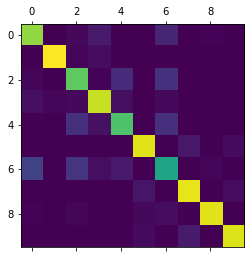

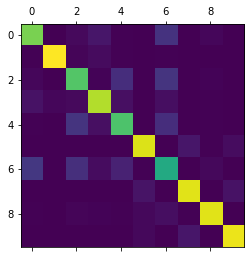

In [24]:
#Confusion matrix visualization
plt.matshow(confusion_SVM)
plt.matshow(confusion_LR)

## QUESTION 5
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.
    
    The probable causes are related to similar clothes that might be confused in the prediction. For this reason we obtain similar misprediction for logistic regression and SVM.